In [2]:
%matplotlib inline

In [4]:
"""
==========================
Gaussian HMM of stock data
==========================

This script shows how to use Gaussian HMM.
It uses stock price data, which can be obtained from yahoo finance.
For more information on how to get stock prices with matplotlib, please refer
to date_demo1.py of matplotlib.

"""

from __future__ import print_function

import datetime
import numpy as np
import pylab as pl
from matplotlib.finance import quotes_historical_yahoo_ochl
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from hmmlearn.hmm import GaussianHMM


print(__doc__)


Gaussian HMM of stock data

This script shows how to use Gaussian HMM.
It uses stock price data, which can be obtained from yahoo finance.
For more information on how to get stock prices with matplotlib, please refer
to date_demo1.py of matplotlib.




In [9]:
###############################################################################
# Downloading the data
date1 = datetime.date(1995, 1, 1)  # start date
date2 = datetime.date(2012, 1, 6)  # end date
# get quotes from yahoo finance
quotes = quotes_historical_yahoo_ochl("INTC", date1, date2)
if len(quotes) == 0:
    raise SystemExit

# unpack quotes
dates = np.array([q[0] for q in quotes], dtype=int)
close_v = np.array([q[2] for q in quotes])
volume = np.array([q[5] for q in quotes])[1:]

# take diff of close value
# this makes len(diff) = len(close_t) - 1
# therefore, others quantity also need to be shifted
diff = close_v[1:] - close_v[:-1]
dates = dates[1:]
close_v = close_v[1:]

# pack diff and volume for training
X = np.column_stack([diff, volume])
X

array([[ -1.00000000e-02,   4.18656000e+07],
       [  3.00000000e-02,   6.04800000e+07],
       [  4.00000000e-02,   5.63168000e+07],
       ..., 
       [  5.10000000e-01,   4.75040000e+07],
       [  2.60000000e-01,   4.94906000e+07],
       [ -1.40000000e-01,   3.63435000e+07]])


Gaussian HMM of stock data

This script shows how to use Gaussian HMM.
It uses stock price data, which can be obtained from yahoo finance.
For more information on how to get stock prices with matplotlib, please refer
to date_demo1.py of matplotlib.


fitting to HMM and decoding ...done

Transition matrix
[[  9.76798479e-01   2.40375987e-18   2.39852837e-03   2.08029890e-02
    3.18019630e-09]
 [  6.31696080e-17   6.28135155e-01   3.27436208e-02   2.40962653e-02
    3.15024959e-01]
 [  8.71369811e-04   2.92795579e-02   8.20254651e-01   1.88345129e-06
    1.49592538e-01]
 [  2.61907027e-01   3.25098668e-01   3.62436300e-18   4.12994306e-01
    1.65078863e-17]
 [  3.88321797e-03   1.18186652e-01   1.54364149e-01   3.52981451e-03
    7.20036166e-01]]

means and vars of each hidden state
0th hidden state
mean =  [  2.57054368e-02   4.96929559e+07]
var =  [  7.63909465e-01   2.50769218e+14]

1th hidden state
mean =  [  3.46311611e-02   1.10396574e+08]
var =  [  1.68810002e-01   8.81622332e+

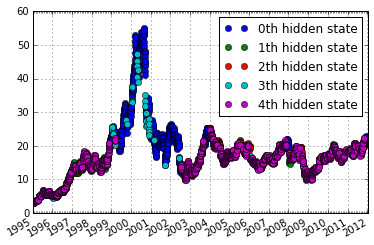

In [3]:
###############################################################################
# Run Gaussian HMM
print("fitting to HMM and decoding ...", end='')

# make an HMM instance and execute fit
model = GaussianHMM(n_components=5, covariance_type="diag", n_iter=1000).fit(X)

# predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done\n")

###############################################################################
# print trained parameters and plot
print("Transition matrix")
print(model.transmat_)
print()

print("means and vars of each hidden state")
for i in range(model.n_components):
    print("%dth hidden state" % i)
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
fig = pl.figure()
ax = fig.add_subplot(111)

for i in range(model.n_components):
    # use fancy indexing to plot data in each state
    idx = (hidden_states == i)
    ax.plot_date(dates[idx], close_v[idx], 'o', label="%dth hidden state" % i)
ax.legend()

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()

# format the coords message box
ax.fmt_xdata = DateFormatter('%Y-%m-%d')
ax.fmt_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

fig.autofmt_xdate()
pl.show()